--------------------
# Lab 3 Report
--------------------

## Implementer -> Ati tesakulsiri
## Studentid -> st123009
--------------------

## Part 0 Loading and Checking

In [1]:
from model_calling import *
import torchvision.datasets as dataset_
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
import time
import os
from copy import copy
from copy import deepcopy
import numpy as np
from torchvision.transforms.transforms import RandomCrop
from model_training_ import *
import pickle
import torchvision.utils as vutils
from torch.utils.data import TensorDataset
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from get_loss_ac import *

In [2]:
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
eval_preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
test_dataset = torchvision.datasets.CIFAR10(root='/root/data_keep', train=False,
                                            download=True, transform=eval_preprocess)

BATCH_SIZE = 10
NUM_WORKERS = 2
criterion0 = nn.CrossEntropyLoss()
criterion1 = nn.CrossEntropyLoss()

test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE,
                                              shuffle=False, num_workers=NUM_WORKERS)

dataset_test_muff = dataset_.ImageFolder(root='/root/data_keep/muff_test',
                                    transform=transforms.Compose([
                                        transforms.Resize(256),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(
                                            (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                    ]))
test_dataloader_muff = torch.utils.data.DataLoader(
    dataset_test_muff, batch_size=4, shuffle=True)

Files already downloaded and verified


In [3]:
!nvidia-smi

Wed Feb  1 09:56:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:84:00.0 Off |                  N/A |
| 24%   31C    P8    23W / 250W |   2244MiB / 11264MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:85:00.0 Off |                  N/A |
| 22%   

## Part 1 Introduction

## Part 2 Methodology

## Part 3 Result
### 3.1 vscode Project Structure
``` bash
Res_pyProj/
├── Result
│   ├── SE_muff_acc0.atikeep
│   ├── SE_muff_acc1.atikeep
│   ├── SE_muff_acc2.atikeep
│   ├── SE_muff_acc3.atikeep
│   ├── SE_muff_acc4.atikeep
│   ├── SE_muff_acc5.atikeep
│   ├── SE_muff_chi_model0.pth
│   ├── SE_muff_chi_model1.pth
│   ├── SE_muff_chi_model2.pth
│   ├── SE_muff_chi_model3.pth
│   ├── SE_muff_chi_model4.pth
│   ├── SE_muff_chi_model5.pth
│   ├── SEresnet18_bestsofar.pth
│   └── resnet18_bestsofar.pth
├── __pycache__
│   ├── model_calling.cpython-38.pyc
│   ├── model_training_.cpython-38.pyc
│   ├── module_ResSE.cpython-38.pyc
│   ├── module_Resnet.cpython-38.pyc
│   ├── module_SELayer.cpython-38.pyc
│   └── module_bottle_basBlo.cpython-38.pyc
├── get_loss_ac.py
├── model_calling.py
├── model_training_.py
├── module_ResSE.py
├── module_Resnet.py
├── module_SELayer.py
├── module_bottle_basBlo.py
├── muffin_destroyer.py
├── res18_runner.py
├── resSE18_runner.py
└── st123009_report.ipynb

2 directories, 31 files
```

## 3.2 Restnet and RestnetSE18 model

In [4]:
model_res = ResNet18()
model_res.load_state_dict(torch.load(
        '/root/keep_lab/RTML_Labsession/03_resnet/Res_pyProj/Result/resnet18_bestsofar.pth'))

<All keys matched successfully>

In [4]:
model_res

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

In [5]:
modelSE = ResSENet18()

modelSE.load_state_dict(torch.load(
        '/root/keep_lab/RTML_Labsession/03_resnet/Res_pyProj/Result/SEresnet18_bestsofar.pth'))

<All keys matched successfully>

In [6]:
modelSE

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualSEBasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (se): SELayer(
        (avg_pool): AdaptiveAvgPool2d(output_size=1)
        (fc): Sequential(
          (0): Linear(in_features=64, out_features=4, bias=False)
          (1): ReLU(inplace=True)
          (2): Linear(in_features=4, out_features=64, bias=False)
          (3): Sigmoid()
        )

In [7]:
res18text, res18SEtext = text_toget()
print('REsnet18 Training Result')
lossval_res,accval_res = getlossacctext(res18text)
print('*'*30)


REsnet18 Training Result
iter 0 VALSET:Loss-> 1.3286 acc-> 0.517
iter 1 VALSET:Loss-> 1.0414 acc-> 0.637
iter 2 VALSET:Loss-> 0.7575 acc-> 0.739
iter 3 VALSET:Loss-> 0.6711 acc-> 0.768
iter 4 VALSET:Loss-> 0.6125 acc-> 0.786
iter 5 VALSET:Loss-> 0.5654 acc-> 0.802
iter 6 VALSET:Loss-> 0.5959 acc-> 0.802
iter 7 VALSET:Loss-> 0.5491 acc-> 0.824
iter 8 VALSET:Loss-> 0.5175 acc-> 0.827
iter 9 VALSET:Loss-> 0.6183 acc-> 0.812
iter 10 VALSET:Loss-> 0.6524 acc-> 0.81
iter 11 VALSET:Loss-> 0.5816 acc-> 0.825
iter 12 VALSET:Loss-> 0.5791 acc-> 0.833
iter 13 VALSET:Loss-> 0.5981 acc-> 0.837
iter 14 VALSET:Loss-> 0.5599 acc-> 0.841
iter 15 VALSET:Loss-> 0.6473 acc-> 0.832
iter 16 VALSET:Loss-> 0.7788 acc-> 0.82
iter 17 VALSET:Loss-> 0.727 acc-> 0.829
iter 18 VALSET:Loss-> 0.7218 acc-> 0.83
iter 19 VALSET:Loss-> 0.6678 acc-> 0.84
iter 20 VALSET:Loss-> 0.8104 acc-> 0.824
iter 21 VALSET:Loss-> 0.7316 acc-> 0.835
iter 22 VALSET:Loss-> 0.7208 acc-> 0.834
iter 23 VALSET:Loss-> 0.7547 acc-> 0.839
iter 2

In [8]:
print('REsnet18SE traning result')
lossval_SE,accval_SE = getlossacctext(res18SEtext)

REsnet18SE traning result
iter 0 VALSET:Loss-> 1.3794 acc-> 0.507
iter 1 VALSET:Loss-> 1.028 acc-> 0.634
iter 2 VALSET:Loss-> 0.8482 acc-> 0.705
iter 3 VALSET:Loss-> 0.7034 acc-> 0.758
iter 4 VALSET:Loss-> 0.6566 acc-> 0.777
iter 5 VALSET:Loss-> 0.6323 acc-> 0.783
iter 6 VALSET:Loss-> 0.552 acc-> 0.813
iter 7 VALSET:Loss-> 0.536 acc-> 0.818
iter 8 VALSET:Loss-> 0.5198 acc-> 0.825
iter 9 VALSET:Loss-> 0.543 acc-> 0.818
iter 10 VALSET:Loss-> 0.5511 acc-> 0.827
iter 11 VALSET:Loss-> 0.5425 acc-> 0.829
iter 12 VALSET:Loss-> 0.5823 acc-> 0.826
iter 13 VALSET:Loss-> 0.5373 acc-> 0.833
iter 14 VALSET:Loss-> 0.5914 acc-> 0.832
iter 15 VALSET:Loss-> 0.5751 acc-> 0.834
iter 16 VALSET:Loss-> 0.5704 acc-> 0.844
iter 17 VALSET:Loss-> 0.571 acc-> 0.838
iter 18 VALSET:Loss-> 0.6027 acc-> 0.843
iter 19 VALSET:Loss-> 0.6869 acc-> 0.821
iter 20 VALSET:Loss-> 0.628 acc-> 0.836
iter 21 VALSET:Loss-> 0.6437 acc-> 0.837
iter 22 VALSET:Loss-> 0.6363 acc-> 0.84
iter 23 VALSET:Loss-> 0.6905 acc-> 0.83
iter 24 

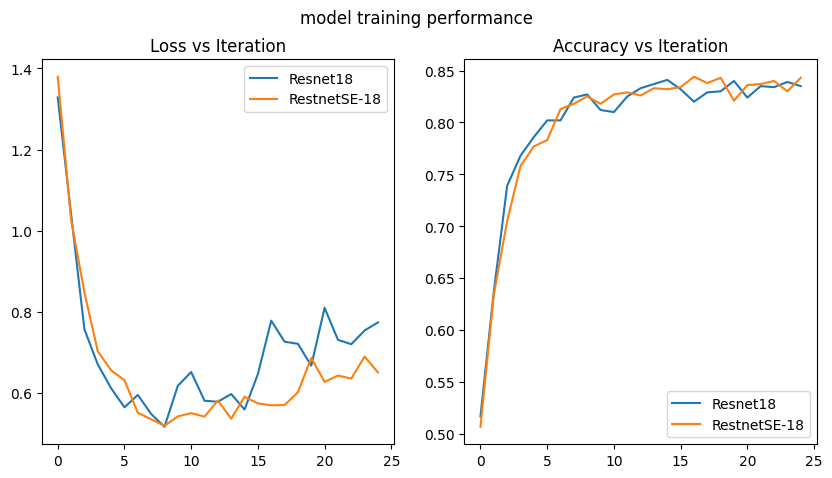

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
fig.suptitle('model training performance')
ax1.plot(lossval_res,label = 'Resnet18')
ax1.plot(lossval_SE,label = 'RestnetSE-18')
ax1.legend()
ax1.set_title('Loss vs Iteration')

ax2.plot(accval_res,label = 'Resnet18')
ax2.plot(accval_SE,label = 'RestnetSE-18')
ax2.legend()
ax2.set_title('Accuracy vs Iteration')
plt.show()

In [14]:

test_loss, test_acc, test_pred_label, test_true_label  = evaluate(model_res.to(device), test_dataloader, criterion0, device)
resnet_result_test = [test_acc,test_pred_label,test_true_label]
print('accuracy for model resnet18 is ',resnet_result_test[0])

accuracy for model resnet18 is  83.87003016648143


In [16]:
test_loss, test_acc, test_pred_label, test_true_label  = evaluate(modelSE.to(device), test_dataloader, criterion1, device)
resnetSE_result_test = [test_acc,test_pred_label,test_true_label]
print('accuracy for model resnet18SE is ',resnetSE_result_test[0])

accuracy for model resnet18SE is  84.12967154746934


### 3.X Chihuahua vs Muffin challenge
- We train with a `Resnet18 + Squeeze and Excited that pretrained with CIFAR 10`
    - With 6 different hyperparameter and optimizer
        -  'Train with adam optimizer with Lr = 0.005',
        - 'Train with adam optimizer with Lr = 0.015',
        - 'Train with adam optimizer with Lr = 0.025',
        - 'Train with adam optimizer with Lr = 0.035',
        - 'Train with SGD optimizer with Lr = 0.0005 and Momentum = 0.91',
        - 'Train with SGD optimizer with Lr = 0.0005 and Momentum = 0.991'

In [8]:
acc_muff = []
loss_muff = []
for i in range(6):
    with open(f'Result/SE_muff_acc{i}.atikeep','rb') as dic:
        a,l = pickle.load(dic)
        acc_muff.append(a)
        loss_muff.append(l)
tit_name = [
'Train with adam optimizer with Lr = 0.005',
'Train with adam optimizer with Lr = 0.015',
'Train with adam optimizer with Lr = 0.025',
'Train with adam optimizer with Lr = 0.035',
'Train with SGD optimizer with Lr = 0.0005 and Momentum = 0.91',
'Train with SGD optimizer with Lr = 0.0005 and Momentum = 0.991'
]

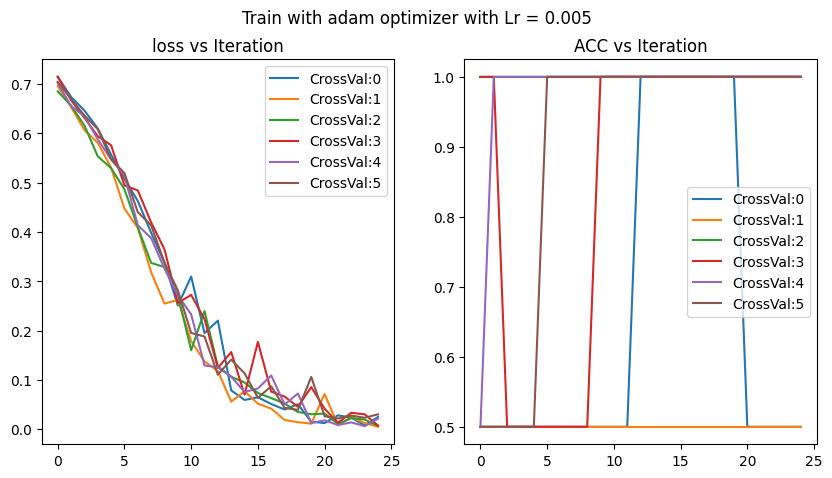

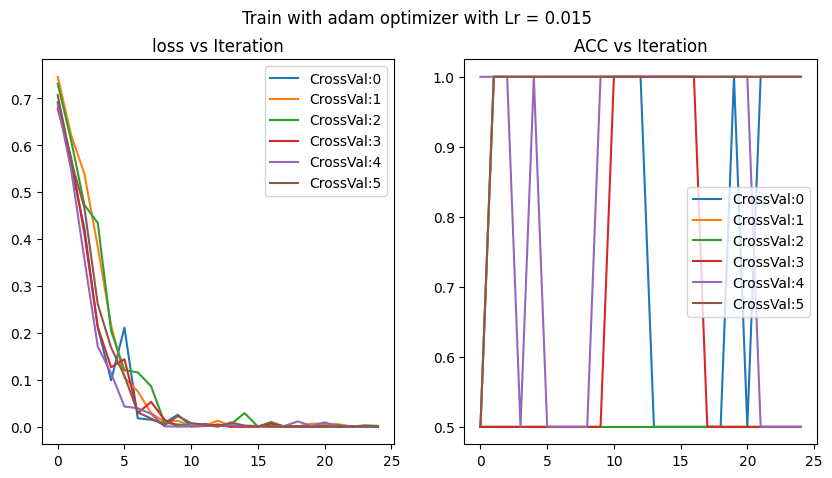

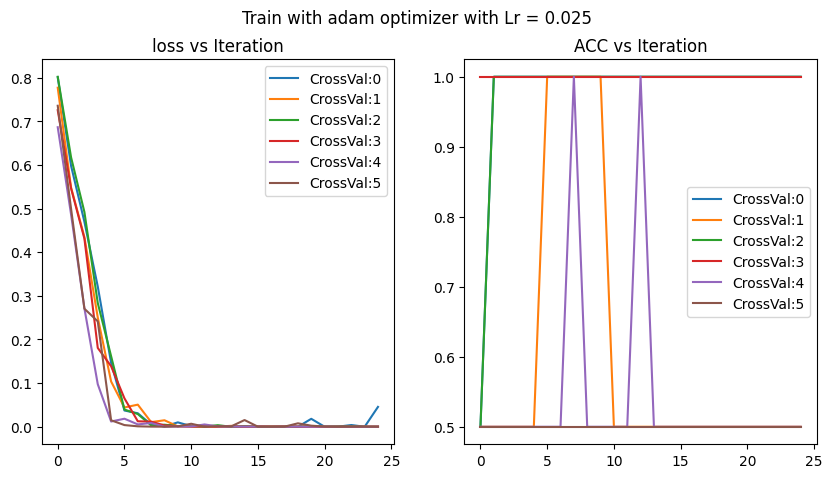

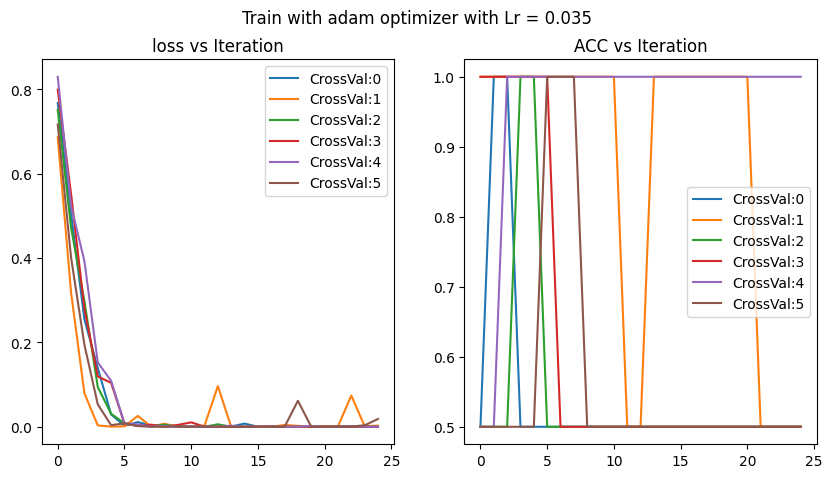

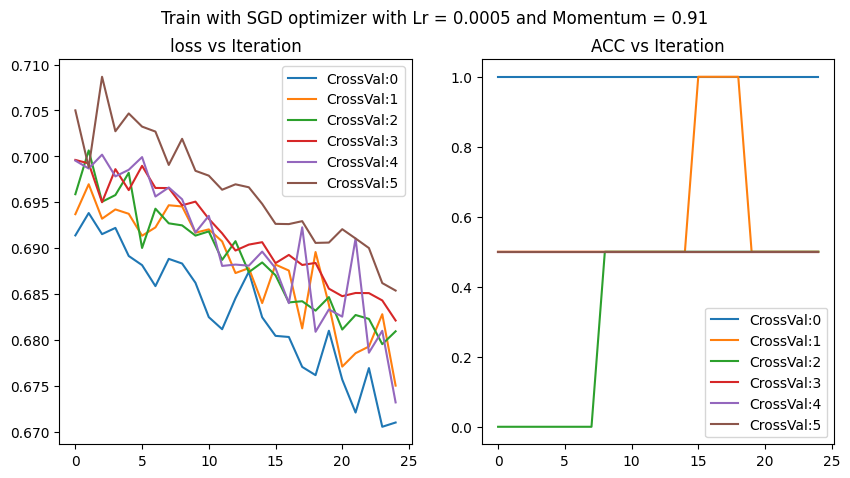

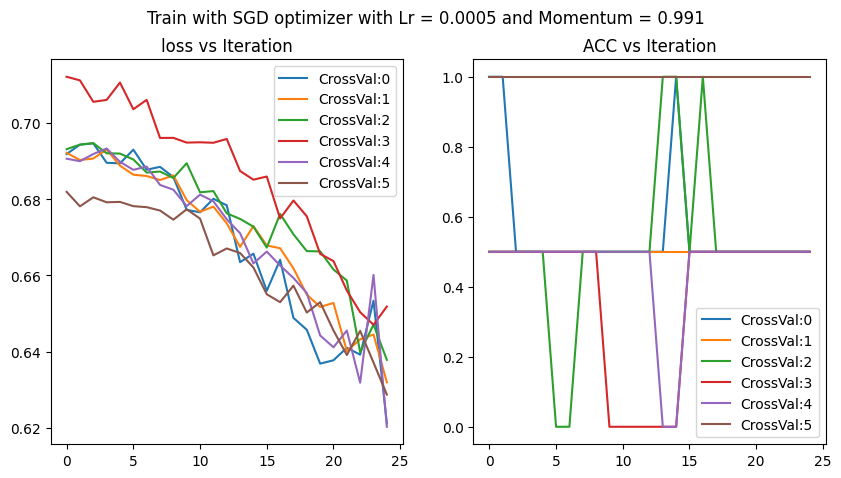

In [9]:
for i,l,title in zip(acc_muff,loss_muff,tit_name):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
    fig.suptitle(title)
    for inx,(j,k) in enumerate(zip(i,l)):
        ax2.plot(j,label=f'CrossVal:{inx}')
        
        ax1.plot(k,label=f'CrossVal:{inx}')
    ax2.set_title('ACC vs Iteration')
    ax1.set_title('loss vs Iteration')
    ax2.legend()
    ax1.legend()
    plt.show()

- We saw that with Adam and Lr = 0.015 given good result as same as Lr = 0.005 and 0.025 and far better that with SGD

- ### EVAL MUFFIN

In [6]:
model_test = ResSENet18()
model_test.linear = nn.Linear(512,2)
model_test.eval()
model_test.to(device)
model_test.load_state_dict(torch.load(f'/root/keep_lab/RTML_Labsession/03_resnet/Res_pyProj/Result/SE_muff_chi_model2.pth'))
criterion2 = nn.CrossEntropyLoss().to(device)
test_loss, test_acc, test_pred_label, test_true_label  = evaluate_(model_test.to(device),test_dataloader_muff, criterion2, device)
muff_resnetSE_result_test = [test_acc,test_pred_label,test_true_label]
print('accuracy for model resnetSE18 Pretrained from CIFAR-10 with Muffin challenge  is ',muff_resnetSE_result_test[0])

accuracy for model resnetSE18 Pretrained from CIFAR-10 with Muffin challenge  is  100.0
